In [49]:
import os
os.getcwd()

'C:\\Users\\xxoel\\Desktop\\공모전'

In [1]:
import datetime
now = datetime.datetime.now()
print(now)
nowdate = now.strftime('%Y-%m-%d')
print(nowdate)

yesterday = now - datetime.timedelta(1)
print(yesterday)

yesterday_date = yesterday.strftime('%Y-%m-%d')
print(yesterday_date)

the_day_of_yesterday = yesterday - datetime.timedelta(1)
print(the_day_of_yesterday)

the_day_of_yesterday_date = the_day_of_yesterday.strftime('%Y-%m-%d')
print(the_day_of_yesterday_date)

2021-10-02 21:38:19.455602
2021-10-02
2021-10-01 21:38:19.455602
2021-10-01
2021-09-30 21:38:19.455602
2021-09-30


In [3]:
import requests, json
from urllib import parse
import pandas as pd
url = "http://tools.kinds.or.kr:8888/query_rank"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
   "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "from": "2021-10-01",
        "until": "2021-10-01",
        "offset": 10,
        "target_access_key": ""
    }
}
response = requests.post(url, data=json.dumps(params))
response.text

'{"result":0,"return_object":{"queries":[{"date":"20211001","query":"이재명","count":1085},{"date":"20211001","query":"mrna","count":783},{"date":"20211001","query":"국책사업","count":782},{"date":"20211001","query":"국책과제","count":779},{"date":"20211001","query":"매각","count":776},{"date":"20211001","query":"윤석열","count":773},{"date":"20211001","query":"김동연","count":772},{"date":"20211001","query":"디지털화폐","count":772},{"date":"20211001","query":"소형원전","count":772},{"date":"20211001","query":"단독","count":771}]}}'

In [4]:
from pandas.io.json import json_normalize
import json

json_object = json.loads(response.text)

rank_1 = json_object['return_object']['queries'][0]['query']
rank_2 = json_object['return_object']['queries'][1]['query']
rank_3 = json_object['return_object']['queries'][2]['query']

ranking=[]
for i in range(3) :
    ranking.append(json_object['return_object']['queries'][i]['query'])

query = ranking[0] + " OR " + ranking[1] + " OR " + ranking[2]
print(query)


이재명 OR mrna OR 국책사업


In [8]:
import requests, json
from urllib import parse
import pandas as pd
url = "http://tools.kinds.or.kr:8888/word_cloud"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
    "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "query": "이재명",
        "published_at": {
            "from": "2021-09-30",
            "until" : "2021-10-01"
        }
    }
}
response = requests.post(url, data=json.dumps(params))
response.text

'{"result":0,"return_object":{"nodes":[{"id":2,"name":"이낙연","level":1,"weight":55.18},{"id":3,"name":"대장동 의혹","level":3,"weight":53.86},{"id":4,"name":"민주당","level":3,"weight":43.32},{"id":5,"name":"윤석열","level":3,"weight":43.12},{"id":6,"name":"더불어민주당","level":3,"weight":25.05},{"id":7,"name":"추미애","level":3,"weight":17.96},{"id":8,"name":"이준석 국민","level":1,"weight":26.35},{"id":9,"name":"화천대유","level":3,"weight":24.67},{"id":10,"name":"변학도","level":3,"weight":20.55},{"id":11,"name":"이준석 대표","level":3,"weight":17.25},{"id":13,"name":"유동규","level":1,"weight":23.84},{"id":14,"name":"성남도시개발공사 기획본부장","level":3,"weight":16.06},{"id":15,"name":"핵심 인물","level":3,"weight":9.74},{"id":16,"name":"최측근","level":3,"weight":7.73},{"id":17,"name":"검찰총장","level":2,"weight":22.79},{"id":18,"name":"홍준표","level":3,"weight":13.1},{"id":19,"name":"대권주자","level":3,"weight":7.47},{"id":20,"name":"대장동 개발 특혜 의혹","level":2,"weight":18.0},{"id":21,"name":"더불어민주당 대선 경선 후보","level":2,"weight":15.15},{"id":22,"nam

     name  weight
0     이낙연   55.18
1  대장동 의혹   53.86
2     민주당   43.32
3     윤석열   43.12
4  더불어민주당   25.05


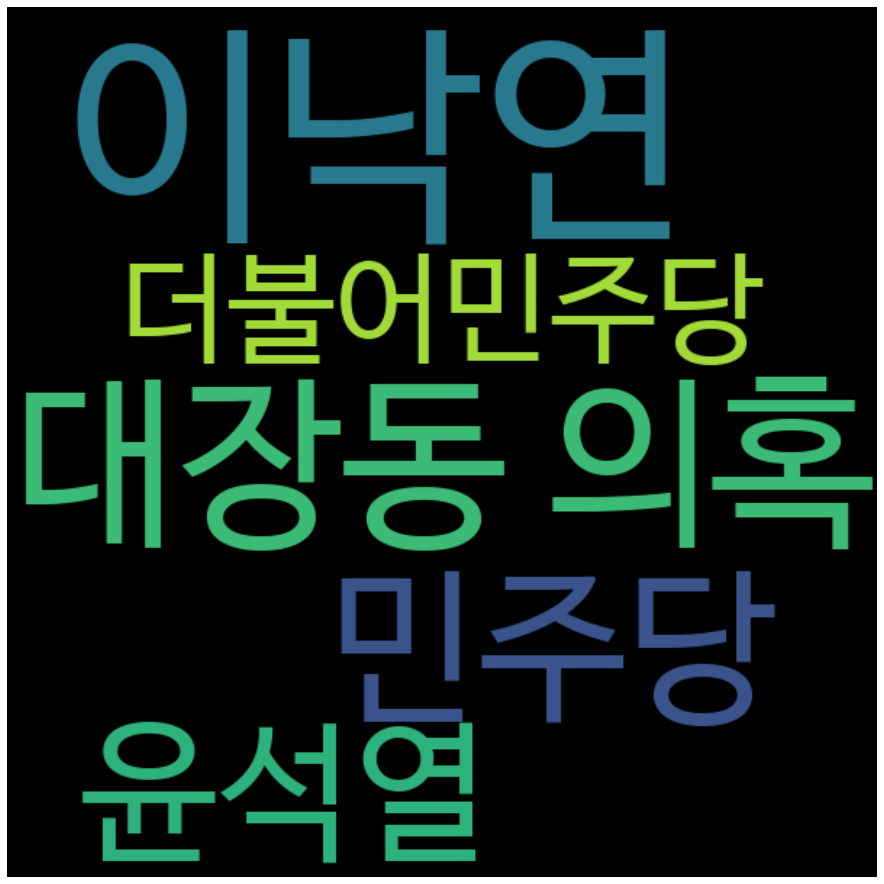

In [60]:
from pandas.io.json import json_normalize
import json

json_object = json.loads(response.text)

json_object['return_object']['nodes']

# print(json_object['return_object']['nodes'][0])

df1 = pd.json_normalize(json_object['return_object']['nodes'][:5])
df2 = df1[["name","weight"]]

data = dict(zip(df2['name'].tolist(), df2['weight'].tolist()))

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline

wc = WordCloud(font_path='NanumBarunGothic.ttf',
              width=600,height=600,max_words=100, min_font_size=30)
cloud = wc.generate_from_frequencies(data)

plt.figure(figsize=(16,16))                                           
plt.axis('off')                                                       
plt.imshow(cloud,interpolation="bilinear")


In [31]:
a = []
for i in range(len(json_object['return_object']['nodes'])) :
    a.append(json_object['return_object']['nodes'][i])

print(a)

[{'id': 2, 'name': '이낙연', 'level': 1, 'weight': 55.18}, {'id': 3, 'name': '대장동 의혹', 'level': 3, 'weight': 53.86}, {'id': 4, 'name': '민주당', 'level': 3, 'weight': 43.32}, {'id': 5, 'name': '윤석열', 'level': 3, 'weight': 43.12}, {'id': 6, 'name': '더불어민주당', 'level': 3, 'weight': 25.05}, {'id': 7, 'name': '추미애', 'level': 3, 'weight': 17.96}, {'id': 8, 'name': '이준석 국민', 'level': 1, 'weight': 26.35}, {'id': 9, 'name': '화천대유', 'level': 3, 'weight': 24.67}, {'id': 10, 'name': '변학도', 'level': 3, 'weight': 20.55}, {'id': 11, 'name': '이준석 대표', 'level': 3, 'weight': 17.25}, {'id': 13, 'name': '유동규', 'level': 1, 'weight': 23.84}, {'id': 14, 'name': '성남도시개발공사 기획본부장', 'level': 3, 'weight': 16.06}, {'id': 15, 'name': '핵심 인물', 'level': 3, 'weight': 9.74}, {'id': 16, 'name': '최측근', 'level': 3, 'weight': 7.73}, {'id': 17, 'name': '검찰총장', 'level': 2, 'weight': 22.79}, {'id': 18, 'name': '홍준표', 'level': 3, 'weight': 13.1}, {'id': 19, 'name': '대권주자', 'level': 3, 'weight': 7.47}, {'id': 20, 'name': '대장동 개발 특혜 의

In [50]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline

wordcloud = WordCloud(font_path='NanumBarunGothic.ttf').generate(df3)

TypeError: expected string or bytes-like object

In [61]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

# 윈도우용 크롬 웹 드라이버 실행 경로
excutable_path = "chromedriver.exe"

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://www.bigkinds.or.kr/"

# 크롬 드라이버를 사용합니다.
driver = webdriver.Chrome(executable_path=excutable_path)

# 드라이버가 브라우징 할 페이지 소스를 입력합니다.
driver.get(source_url)
time.sleep(1)
#페이지가 다 불러오기도 전에 HTML소스를 가져와서 sleep을 줌

req = driver.page_source

# 사이트 html 구조에 기반하여 데이터를 파싱합니다.

soup=BeautifulSoup(req, "html.parser")
contents_table = soup.find(name="main")
table_body =contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

# a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트를 생성합니다.
page_url_base = "https://www.bigkinds.or.kr/"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0 :
        page_url = page_url_base + td_url[0].get('href')
        if "png" not in page_url:
            page_urls.append(page_url)
            
# 중복 url을 제거합니다
page_urls = list(set(page_urls))
for page in page_urls[:3] :
    print(page)

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


# 빅카인즈크롤링 URL 수집

In [10]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import time

excutable_path = "chromedriver.exe"

source_url = "https://www.bigkinds.or.kr/"

driver = webdriver.Chrome(executable_path=excutable_path)
driver.get(source_url)
total_search_key = driver.find_element_by_id('total-search-key')
total_search_key.send_keys("이재명")
total_search_key.send_keys(Keys.ENTER)
select_option = driver.find_element_by_xpath("""//*[@id="select1"]/option[1]""").click()

url = driver.current_url
resp = select_option.get(url)
soup = bs(resp.text, "lxml")

NameError: name 'requests' is not defined

In [20]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import re
import time
import requests

excutable_path = "chromedriver.exe"

source_url = "https://www.bigkinds.or.kr/"

driver = webdriver.Chrome(executable_path=excutable_path)
driver.get(source_url)

search =  driver.find_element_by_xpath("""//*[@id="total-search-key"]""")
search.send_keys("이재명")
search.send_keys(Keys.ENTER)
driver.implicitly_wait(30)

url = driver.current_url
resp = driver.get(url)
soup = bs(resp.text, "lxml")

# news = resp.find_element_by_xpath(
#     """//*[@id="news-results"]/div[1]/div/div[2]/a/div/strong/span""").click()



# titles = []
# links = []

# for link in soup.select('h3 >a'):
#     href = 'https://news.google.com' + link.get('href')[1:]
#     title = link.string
#     titles.append(title)
#     links.append(href)

AttributeError: 'NoneType' object has no attribute 'text'

In [28]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import requests

driver = webdriver.Chrome('chromedriver')
driver.get('https://news.google.com/?hl=ko&gl=KR&ceid=KR%3Ako')
driver.implicitly_wait(3)

search = driver.find_element_by_xpath(
    '//*[@id="gb"]/div[2]/div[2]/div/form/div[1]/div/div/div/div/div[1]/input[2]')

search.send_keys("이재명")
search.send_keys(Keys.ENTER)
driver.implicitly_wait(30)

url = driver.current_url
resp = requests.get(url)
soup = bs(resp.text, 'lxml')

titles = []
links = []

for link in soup.select('h3 >a'):
    href = 'https://news.google.com' + link.get('href')[1:]
    title = link.string
    titles.append(title)
    links.append(href)
    
data = {'title': titles, 'link': links}
data_frame = pd.DataFrame(data, columns=['title', 'link'])
print(data_frame)

                                                title  \
0                         이재명 '2차 슈퍼위크'도 압승‥주말 3연전 석권   
1             윤석열 “대장동 설계했다는 이재명, 사퇴하고 수사 받으라” - 조선일보   
2                 [속보] 이재명 부·울·경 55% 득표, 또 1위…이낙연 33%   
3                   이재명 “대장동 사태가 제 청렴함과 국민을 위한 정치 증명”   
4           이재명 “화천대유 돈받은 국민의힘, 가짜뉴스로 이재명 죽이기” - 조선일보   
..                                                ...   
95      ‘대장동 화천대유’보다 더 위험한 이재명의 ‘급소’ [박은주의 돌발] - 조선일보   
96  이낙연측, 대장동 의혹 이재명 정조준 “인허가권 있는 단체장 책임”... 과반득표 ...   
97                이재명 "대장동 민간 이익 4천억대, 예상밖 부동산 폭등 때문"   
98              이재명, 대장동·화천대유와 '연관검색어'로 얽혔지만 '내상'은 아직   
99                   이재명 '과반 3연승' 거둬…대구·경북서 51.12% 득표   

                                                 link  
0   https://news.google.com/articles/CBMiRWh0dHBzO...  
1   https://news.google.com/articles/CBMiV2h0dHBzO...  
2   https://news.google.com/articles/CBMiOmh0dHBzO...  
3   https://news.google.com/articles/CBMiOmh0dHBzO...  
4   https://news.google.com/article

In [25]:
import requests, json
from urllib import parse
import pandas as pd
url = "http://tools.kinds.or.kr:8888/search/news"
api_key_utf8 = "526a56bd-8033-4ab2-8587-c5f3b4ef47f8"
api_key_decode = requests.utils.unquote(api_key_utf8, encoding='utf-8')
params = {
   "access_key": "526a56bd-8033-4ab2-8587-c5f3b4ef47f8",
    "argument": {
        "query": "이재명",
        "published_at": {
            "from": "2021-09-01",
            "until": "2021-09-30"
        },
        "sort": {"date": "desc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 5,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id"
        ]
    }
}

response = requests.post(url, data=json.dumps(params))
response.text

'{"result":0,"return_object":{"total_hits":9635,"documents":[{"news_id":"02100601.20210929001826001","title":"[사설] 사기 공영, 부패 전관, 아빠 찬스…\\u0027공정 한국\\u0027 현주소다","hilight":"[사설] 사기 공영, 부패 전관, 아빠 찬스…\\u0027공정 한국\\u0027 현주소다 날마다 심상찮은 의혹이 새로 불거지는 ..‘대장동 스캔들’은 제기된 것만으로도 ..‘권력남용형 게이트’ 요소를 다 갖췄다... 검찰이 떠밀리듯 수사에 나섰지만 지켜보는 국민의 허탈감과 분노..더욱 이해 못 할 처신은 \\u003cb\\u003e이재명\\u003c/b\\u003e 경기지사다...‘\\u003cb\\u003e이재명\\u003c/b\\u003e 패밀리’ 아니냐는 게 의혹의 축 아닌가...","published_at":"2021-09-29T00:00:00.000+09:00","enveloped_at":"2021-09-30T00:18:26.000+09:00","dateline":"2021-09-30T08:29:31.000+09:00","provider":"한국경제","category":["정치\\u003e국회_정당"],"category_incident":[],"byline":"","provider_news_id":"2021092947041"},{"news_id":"08100101.20210929000834002","title":"[빅뉴스] 정부 “공공요금 연말까지 동결”…‘을왕리 음주 역주행’ 치킨배달 가장 치어 숨지게 한 운전자 2심도 징역 5년","hilight":"[빅뉴스] 정부 ..“공공요금 연말까지 동결”…‘을왕리 음주 역주행’ 치킨배달 가장 치어 숨지게 한 운전자 2심도 징역 5년 키워드로 뉴스를 살펴보는 빅 데이터 뉴스, 빅뉴습니다. .. \\u003cb\\u003e이재명\\u003c/b\\u003e 경기지사와 곽상도 의원 고발장을 접수한 고위공직자범

In [26]:
from pandas.io.json import json_normalize
import json

json_object = json.loads(response.text)
json_object

{'result': 0,
 'return_object': {'total_hits': 9635,
  'documents': [{'news_id': '02100601.20210929001826001',
    'title': "[사설] 사기 공영, 부패 전관, 아빠 찬스…'공정 한국' 현주소다",
    'hilight': "[사설] 사기 공영, 부패 전관, 아빠 찬스…'공정 한국' 현주소다 날마다 심상찮은 의혹이 새로 불거지는 ..‘대장동 스캔들’은 제기된 것만으로도 ..‘권력남용형 게이트’ 요소를 다 갖췄다... 검찰이 떠밀리듯 수사에 나섰지만 지켜보는 국민의 허탈감과 분노..더욱 이해 못 할 처신은 <b>이재명</b> 경기지사다...‘<b>이재명</b> 패밀리’ 아니냐는 게 의혹의 축 아닌가...",
    'published_at': '2021-09-29T00:00:00.000+09:00',
    'enveloped_at': '2021-09-30T00:18:26.000+09:00',
    'dateline': '2021-09-30T08:29:31.000+09:00',
    'provider': '한국경제',
    'category': ['정치>국회_정당'],
    'category_incident': [],
    'byline': '',
    'provider_news_id': '2021092947041'},
   {'news_id': '08100101.20210929000834002',
    'title': '[빅뉴스] 정부 “공공요금 연말까지 동결”…‘을왕리 음주 역주행’ 치킨배달 가장 치어 숨지게 한 운전자 2심도 징역 5년',
    'hilight': '[빅뉴스] 정부 ..“공공요금 연말까지 동결”…‘을왕리 음주 역주행’ 치킨배달 가장 치어 숨지게 한 운전자 2심도 징역 5년 키워드로 뉴스를 살펴보는 빅 데이터 뉴스, 빅뉴습니다. .. <b>이재명</b> 경기지사와 곽상도 의원 고발장을 접수한 고위공직자범죄수사처의 경우, 검사가 부족